## Pokémon: Exploratory Data Analysis

##### 1. Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Loading the Data

In [2]:
df = pd.read_csv('pokemon-dataset.csv')
df.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
677,616,Shelmet,Bug,NaN,305,50,40,85,40,65,25,5,False
310,286,Breloom,Grass,Fighting,460,60,130,80,60,60,70,3,False
544,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
654,593,Jellicent,Water,Ghost,480,100,60,70,85,105,60,5,False
260,241,Miltank,Normal,NaN,490,95,80,105,40,70,100,2,False


##### 3. Basic Information

In [3]:
print("="*40)
print("SHAPE OF DATA :")
print(df.shape)
print("="*40)
print()

print("="*40)
print("DATA TYPES :")
print(df.dtypes)
print("="*40)
print()

print("="*40)
print("MISSING VALUES :")
print(df.isnull().sum())
print("="*40)
print()

print("="*40)
print("DATAFRAME INFO :")
df.info()
print("="*40)

SHAPE OF DATA :
(800, 13)

DATA TYPES :
#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

MISSING VALUES :
#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

DATAFRAME INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   

##### 4. Descriptive Stats

In [4]:
print("="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(df.describe())

DESCRIPTIVE STATISTICS
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.

##### 5. Handling Missing Values

In [5]:
df['Type 2'] = df['Type 2'].fillna('None')

##### 6. Top 10 Pokémon by Total Stats

In [6]:
top_pokemon = df.sort_values(by="Total", ascending=False).head(10)
print(top_pokemon[['Name', 'Total']])

                        Name  Total
426    RayquazaMega Rayquaza    780
164      MewtwoMega Mewtwo Y    780
163      MewtwoMega Mewtwo X    780
422      KyogrePrimal Kyogre    770
424    GroudonPrimal Groudon    770
552                   Arceus    720
712       KyuremWhite Kyurem    700
711       KyuremBlack Kyurem    700
409  SalamenceMega Salamence    700
413  MetagrossMega Metagross    700


##### 7. Type Distribution

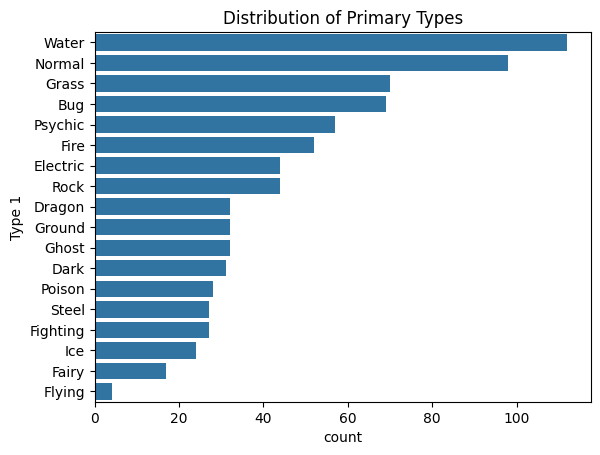

In [7]:
sns.countplot(data=df, y='Type 1', order=df['Type 1'].value_counts().index)
plt.title("Distribution of Primary Types")
plt.show()

##### 8. Stat Comparisons

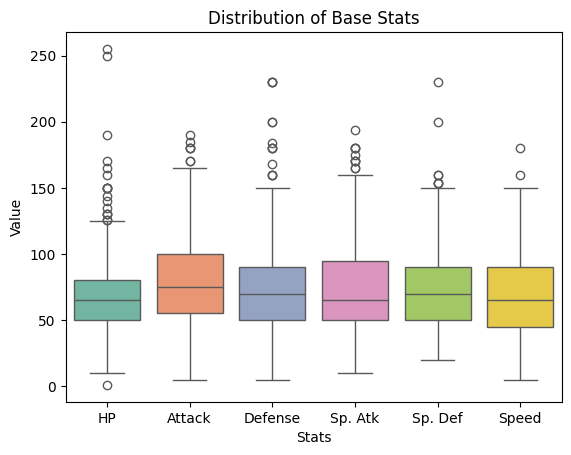

In [8]:
#defining the stat columns
stat_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

#creating the boxplot
sns.boxplot(data=df[stat_cols], palette="Set2")
plt.title("Distribution of Base Stats")
plt.xlabel("Stats")
plt.ylabel("Value")
plt.show()

##### 9. Generation wise Count

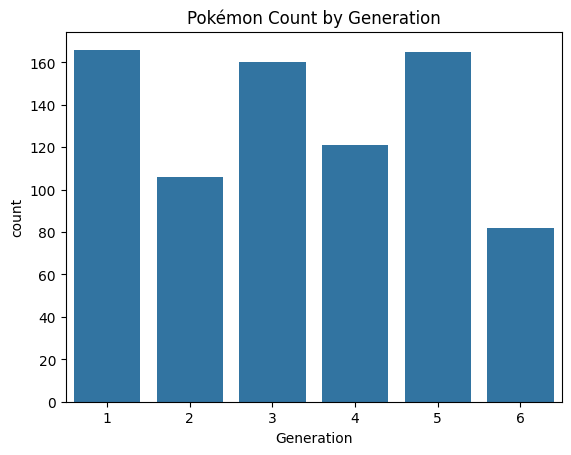

In [9]:
sns.countplot(data=df, x='Generation')
plt.title("Pokémon Count by Generation")
plt.show()

##### 10. Legendary vs Non-Legendary

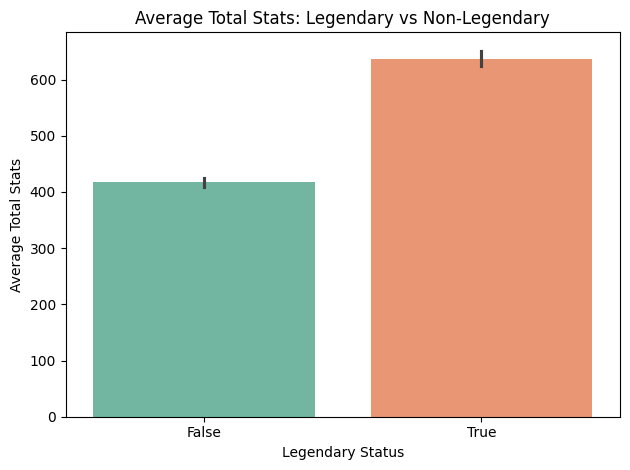

In [10]:
sns.barplot(x='Legendary', y='Total', data=df, hue='Legendary', palette="Set2", legend=False)
plt.title("Average Total Stats: Legendary vs Non-Legendary")
plt.xlabel("Legendary Status")
plt.ylabel("Average Total Stats")
plt.tight_layout()
plt.show()

##### 11. Attack vs Special Attack

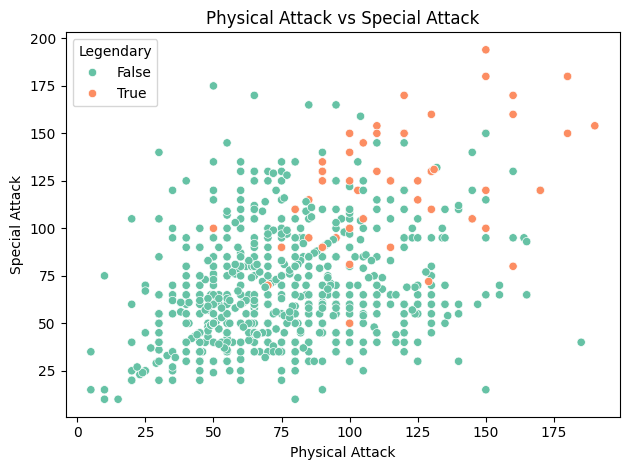

In [11]:
sns.scatterplot(x='Attack', y='Sp. Atk', data=df, hue='Legendary', palette="Set2")
plt.title("Physical Attack vs Special Attack")
plt.xlabel("Physical Attack")
plt.ylabel("Special Attack")
plt.tight_layout()
plt.show()

##### 12. Speed Distribution Plot

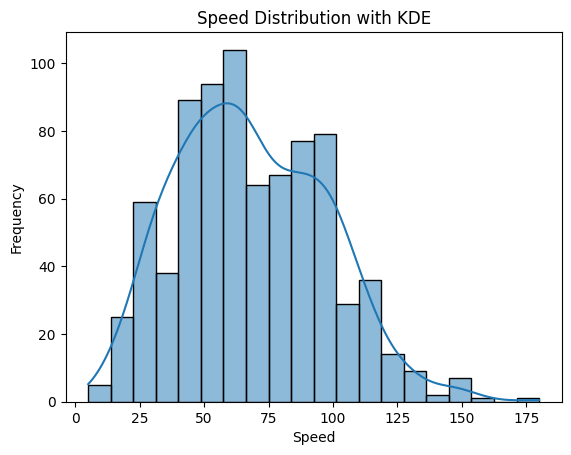

In [12]:
sns.histplot(df['Speed'], bins=20, kde=True)
plt.title("Speed Distribution with KDE")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.show()

##### 13. Legendary Pokemons per Generation

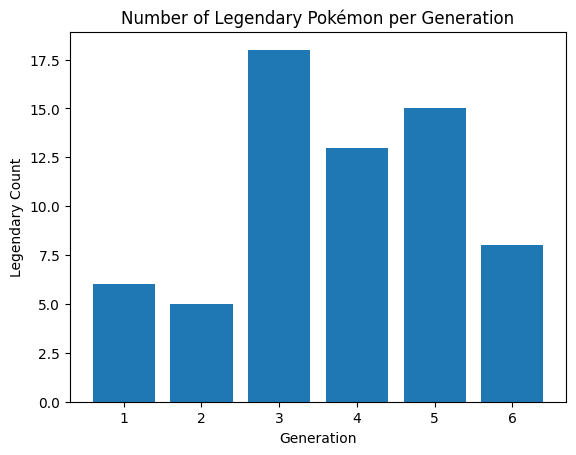

In [13]:
#filtering the data to only include Legendary Pokémon
legendary_pokemon = df[df['Legendary'] == True]

#counting the number of Legendary Pokémon per Generation
legendary_counts = legendary_pokemon.groupby('Generation').size()

#plotting the data
plt.bar(legendary_counts.index, legendary_counts.values)
plt.title('Number of Legendary Pokémon per Generation')
plt.xlabel('Generation')
plt.ylabel('Legendary Count')
plt.show()